Select Mode:
1 Automatic
2 Manual


Crop Water Automation Simulation Started...

12/02/2026 06:00 | Soil:52% | Hum:68% | pH:6.5 | Weather:Clear | Motor:OFF
12/02/2026 07:00 | Soil:48% | Hum:65% | pH:6.6 | Weather:Clouds | Motor:OFF
12/02/2026 08:00 | Soil:45% | Hum:63% | pH:6.4 | Weather:Clear | Motor:OFF
12/02/2026 09:00 | Soil:42% | Hum:60% | pH:6.5 | Weather:Clear | Motor:OFF
12/02/2026 10:00 | Soil:38% | Hum:58% | pH:6.3 | Weather:Clouds | Motor:OFF
12/02/2026 11:00 | Soil:35% | Hum:55% | pH:6.4 | Weather:Clear | Motor:OFF
12/02/2026 12:00 | Soil:30% | Hum:52% | pH:6.2 | Weather:Clear | Motor:OFF
12/02/2026 13:00 | Soil:28% | Hum:50% | pH:6.3 | Weather:Clear | Motor:ON
12/02/2026 14:00 | Soil:25% | Hum:48% | pH:6.1 | Weather:Rain | Motor:OFF
12/02/2026 15:00 | Soil:32% | Hum:53% | pH:6.5 | Weather:Clouds | Motor:OFF
12/02/2026 16:00 | Soil:40% | Hum:57% | pH:6.6 | Weather:Clear | Motor:OFF
12/02/2026 17:00 | Soil:45% | Hum:60% | pH:6.4 | Weather:Clear | Motor:OFF
12/02/2026 18:00 | Soil:50% | Hum:65% | pH:6.5 | Weath

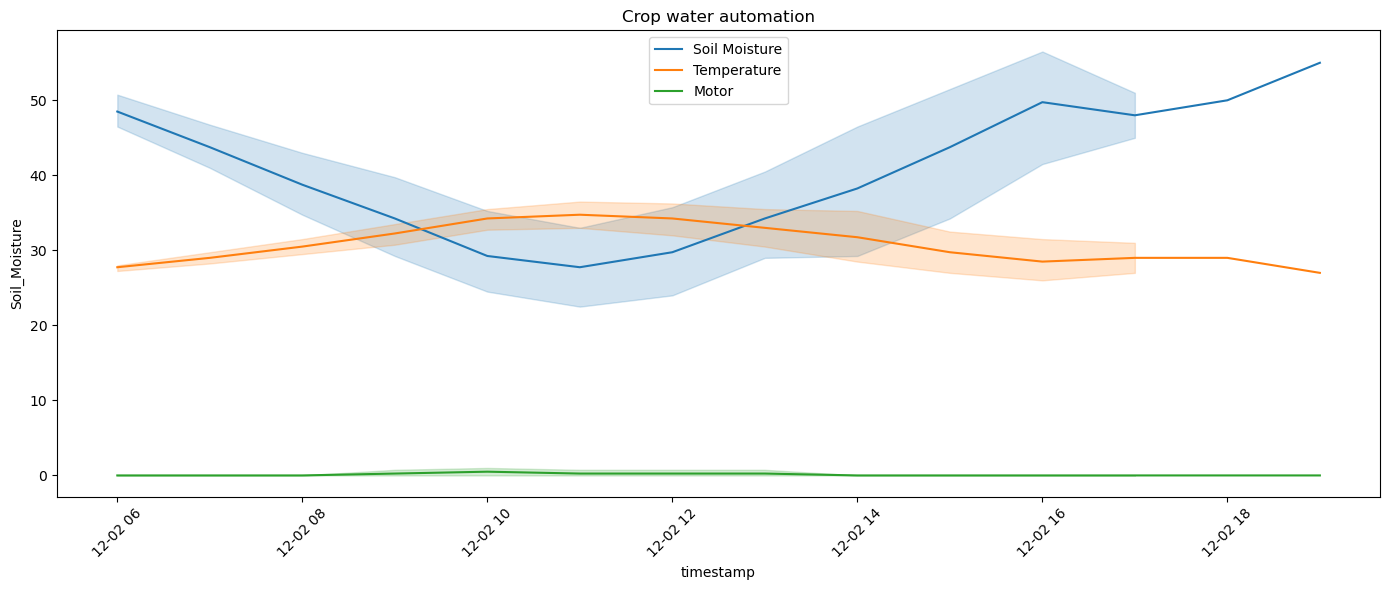

In [4]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("CWA_ds.csv")

data["timestamp"] = pd.to_datetime(data["Date"] + " " + data["Time"])


while True:
    print("Select Mode:")
    print("1 Automatic")
    print("2 Manual")

    choice = input("Enter 1 (or) 2:")

    if choice not in ["1","2"]:
        print("Invalid input please type 1 or 2")
        continue
    choice = int(choice)

    if choice == 1:
        mode = "AUTO"       
        manual_command = None
        break

    elif choice == 2:
        mode = "MANUAL"

        while True:
            manual_command = input("Enter your Command (ON/OFF):").upper()

            if manual_command in ['ON','OFF']:
                break
            else:
                print("Invalid input please type (ON/OFF)")
        break
        
    else:
        print("Invalid input please type (1/2)")


motor_status_list = []
ph_status_list = []

print("Crop Water Automation Simulation Started...\n")


for index, row in data.iterrows():

    soil = row["Soil_Moisture"]
    temp = row["Temperature"]
    humidity = row["Humidity"]
    ph = row["Soil_PH"]
    weather = row["Weather"]

    
    if mode == "AUTO":
        if soil < 30 and humidity < 85 and weather != "Rain":
            motor = "ON"
        else:
            motor = "OFF"
    else:
        motor = manual_command

    
    if ph < 6.0:
        ph_status = "Acidic"
        print("⚠ ALERT: Soil is Acidic")
    elif ph > 7.5:
        ph_status = "Alkaline"
        print("⚠ ALERT: Soil is Alkaline")
    else:
        ph_status = "Normal"

    motor_status_list.append(motor)
    ph_status_list.append(ph_status)

    print(f"{row['Date']} {row['Time']} | Soil:{soil}% | Hum:{humidity}% | pH:{ph} | Weather:{weather} | Motor:{motor}")

    time.sleep(1) 

print("\nSimulation Completed")


data["Motor_Status"] = motor_status_list
data["pH_Status"] = ph_status_list

data.to_csv("simulation_output.csv", index=False)


data["Motor_Numeric"] = data["Motor_Status"].map({"OFF": 0, "ON": 1})

plt.figure(figsize=(14,6))

sns.lineplot(x=data["timestamp"], y=data["Soil_Moisture"], label="Soil Moisture")
sns.lineplot(x=data["timestamp"], y=data["Temperature"], label="Temperature")
sns.lineplot(x=data["timestamp"], y=data["Motor_Numeric"], label="Motor")

plt.xticks(rotation=45)
plt.title("Crop water automation")
plt.tight_layout()
plt.show()
